<a href="https://colab.research.google.com/github/marioklau/Klasifikasi-Suara-Burung-eksperimen-/blob/main/Bird_Sound_Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Set up library

In [8]:
!pip install librosa

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### Definikan path dan label

In [22]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Birds'

img_height, img_width = 64, 64
batch_size = 16
labels = [
    'paok_hijau',
    'pelatuk_ayam',
    'cabak_maling'
]

print(f"Menggunakan dataset dari:{data_path}")
print(f"Nama label: {labels}")
print(f"Jumlah label: {len(labels)}")

Menggunakan dataset dari:/content/drive/MyDrive/Colab Notebooks/Deep Learning/Birds
Nama label: ['paok_hijau', 'pelatuk_ayam', 'cabak_maling']
Jumlah label: 3


In [23]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, 'train'),
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_path, 'val'),
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_path, 'test'),
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 1072 images belonging to 3 classes.
Found 311 images belonging to 3 classes.
Found 178 images belonging to 3 classes.


In [24]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(labels), activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,739 (1.48 MB)

 Trainable params: 388,291 (1.48 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(patience=7, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # disarankan minimal 20-30 epoch
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5470 - loss: 1.4734
Epoch 1: val_loss improved from inf to 1.41931, saving model to best_model.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 323s 5s/step - accuracy: 0.5483 - loss: 1.4682 - val_accuracy: 0.3826 - val_loss: 1.4193 - learning_rate: 0.0010
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7950 - loss: 0.5373
Epoch 2: val_loss did not improve from 1.41931
67/67 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.7955 - loss: 0.5361 - val_accuracy: 0.3666 - val_loss: 1.7687 - learning_rate: 0.0010
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8642 - loss: 0.3167
Epoch 3: val_loss did not improve from 1.41931
67/67 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.8644 - loss: 0.3163 - val_accuracy: 0.3730 - val_loss: 2.3669 - learning_rate: 0.0010
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8941 - loss: 0.2563
Epoch 4: val_loss did not improve from 1.41931

Epoch 4: ReduceLROnPlatea

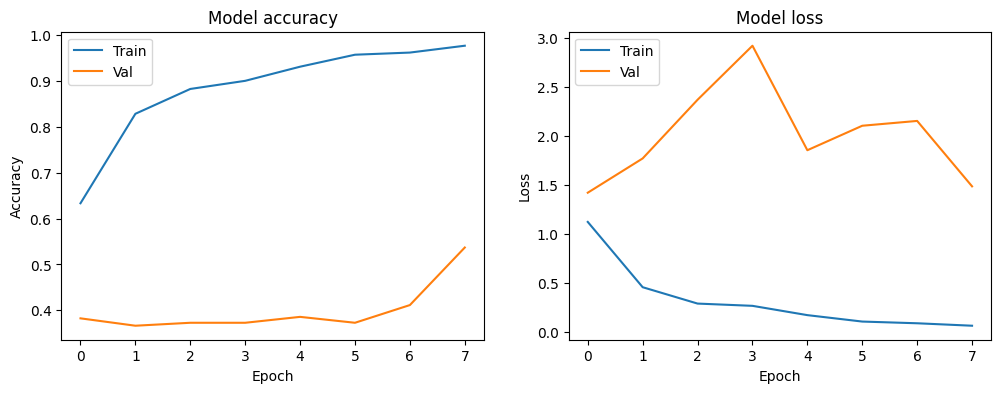

In [26]:
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

In [19]:
!ls '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Birds/train'
!ls '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Birds/val'

cabak_maling  paok_hijau  pelatuk_ayam
 cabak_maling  'cabak_maling (1)'   paok_hijau	 pelatuk_ayam
